In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 6)
# we use regex here to parse the output log files
import re

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read the result from normal experiment first
normal_acc_list = []
normal_steps = []
with open("normal_experiment", 'rb') as normal_file:
    step_counter_ = 0
    for line in normal_file.readlines():
        line_string = line.rstrip('\n')
        search_sth = re.match('Test set: Average loss: (.*), Prec@1: (.*) Prec@5: (.*)', line_string)
        if search_sth:
            acc = search_sth.group(2)
            step_counter_ += 200
            normal_acc_list.append(acc)
            normal_steps.append(step_counter_)
# handle output files of simulated byzantine error then
reverse_scale = [1, 10, 100]
error_accs = []
error_steps = []
error_prefix = "reverse_gradient_"
for s in reverse_scale:
    with open(error_prefix + str(s), 'rb') as r_file:
        step_counter_ = 0
        tmp_acc_list = []
        tmp_steps_list = []
        for line in r_file.readlines():
            line_string = line.rstrip('\n')
            search_sth = re.match('Test set: Average loss: (.*), Prec@1: (.*) Prec@5: (.*)', line_string)
            if search_sth:
                acc = search_sth.group(2)
                step_counter_ += 200
                tmp_acc_list.append(acc)
                tmp_steps_list.append(step_counter_)
    error_accs.append(tmp_acc_list)
    error_steps.append(tmp_steps_list)

# parsing geometric median results then
geo_reverse_scale = [10, 100, 200]
geo_prefix = 'geo_reverse_gradient_'
geo_accs = []
geo_steps = []
for s in geo_reverse_scale:
    with open(geo_prefix + str(s), 'rb') as g_file:
        step_counter_ = 0
        tmp_acc_list = []
        tmp_steps_list = []
        for line in g_file.readlines():
            line_string = line.rstrip('\n')
            search_sth = re.match('Test set: Average loss: (.*), Prec@1: (.*) Prec@5: (.*)', line_string)
            if search_sth:
                acc = search_sth.group(2)
                step_counter_ += 200
                tmp_acc_list.append(acc)
                tmp_steps_list.append(step_counter_)
    geo_accs.append(tmp_acc_list)
    geo_steps.append(tmp_steps_list)

# parse fail 3 out of 7 workers:
ths_acc_list = []
ths_steps = []
with open("fail3_out_of7", 'rb') as ths_file:
    step_counter_ = 0
    for line in ths_file.readlines():
        line_string = line.rstrip('\n')
        search_sth = re.match('Test set: Average loss: (.*), Prec@1: (.*) Prec@5: (.*)', line_string)
        if search_sth:
            acc = search_sth.group(2)
            step_counter_ += 200
            ths_acc_list.append(acc)
            ths_steps.append(step_counter_)

# Byzantine Err Simulation on Ps-4 workers Cluster

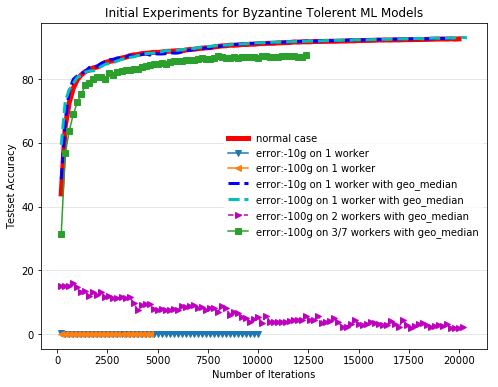

In [3]:
fig = plt.figure()
plt.plot(normal_steps, normal_acc_list, '-r',linewidth=5.0, label="normal case")
plt.plot(error_steps[1], error_accs[1], '-v', label="error:-10g on 1 worker")
plt.plot(error_steps[2], error_accs[2], '-<', label="error:-100g on 1 worker")
plt.plot(geo_steps[0], geo_accs[0], '--b', linewidth=3.0, label="error:-10g on 1 worker with geo_median")
plt.plot(geo_steps[1], geo_accs[1], '--c', linewidth=3.0,label="error:-100g on 1 worker with geo_median")
plt.plot(geo_steps[2], geo_accs[2], '-->m', label="error:-100g on 2 workers with geo_median")
plt.plot(ths_steps, ths_acc_list, '-s', label="error:-100g on 3/7 workers with geo_median")
plt.xlabel("Number of Iterations")
plt.ylabel("Testset Accuracy")
plt.title("Initial Experiments for Byzantine Tolerent ML Models")
legend=plt.legend()
frame = legend.get_frame()
frame.set_facecolor('1.0')
frame.set_edgecolor('1.0')
plt.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
plt.show()

# Byzantine Err Simulation on Ps-45 workers Cluster

In [13]:
# read the result from normal experiment first
normal_acc_list = []
normal_steps = []
with open("exp_nov_18/45_normal", 'rb') as normal_file:
    step_counter_ = 0
    for line in normal_file.readlines():
        line_string = line.rstrip('\n')
        search_sth = re.match('Test set: Average loss: (.*), Prec@1: (.*) Prec@5: (.*)', line_string)
        if search_sth:
            acc = search_sth.group(2)
            step_counter_ += 200
            normal_acc_list.append(acc)
            normal_steps.append(step_counter_)

# parse error machine results
number_machine_fails = [17, 22]
geo_prefix = '45_fail_'
geo_accs = []
geo_steps = []
for s in number_machine_fails:
    with open('exp_nov_18/'+geo_prefix + str(s), 'rb') as g_file:
        step_counter_ = 0
        tmp_acc_list = []
        tmp_steps_list = []
        for line in g_file.readlines():
            line_string = line.rstrip('\n')
            search_sth = re.match('Test set: Average loss: (.*), Prec@1: (.*) Prec@5: (.*)', line_string)
            if search_sth:
                acc = search_sth.group(2)
                step_counter_ += 200
                tmp_acc_list.append(acc)
                tmp_steps_list.append(step_counter_)
    geo_accs.append(tmp_acc_list)
    geo_steps.append(tmp_steps_list)
    
# parse error on constant err machiens
const_err_acc_list = []
const_err_steps = []
with open("exp_nov_18/45_fail_17_constant", 'rb') as const_err_file:
    step_counter_ = 0
    for line in const_err_file.readlines():
        line_string = line.rstrip('\n')
        search_sth = re.match('Test set: Average loss: (.*), Prec@1: (.*) Prec@5: (.*)', line_string)
        if search_sth:
            acc = search_sth.group(2)
            step_counter_ += 200
            const_err_acc_list.append(acc)
            const_err_steps.append(step_counter_)

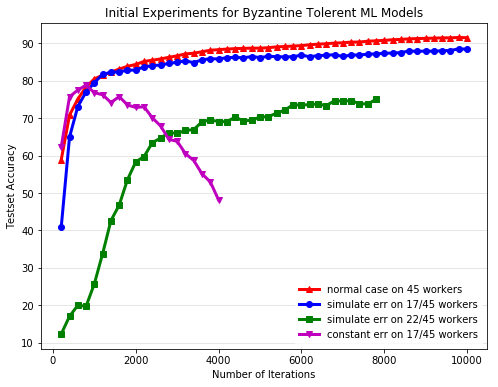

In [14]:
fig = plt.figure()
plt.plot(normal_steps, normal_acc_list, '-^r',linewidth=3.0, label="normal case on 45 workers")
plt.plot(geo_steps[0], geo_accs[0], '-ob', linewidth=3.0, label="simulate err on 17/45 workers")
plt.plot(geo_steps[1], geo_accs[1], '-sg', linewidth=3.0, label="simulate err on 22/45 workers")
plt.plot(const_err_steps, const_err_acc_list, '-vm', linewidth=3.0, label="constant err on 17/45 workers")
plt.xlabel("Number of Iterations")
plt.ylabel("Testset Accuracy")
plt.title("Initial Experiments for Byzantine Tolerent ML Models")
legend=plt.legend()
frame = legend.get_frame()
frame.set_facecolor('1.0')
frame.set_edgecolor('1.0')
plt.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
plt.show()

# Avg Time Costs per Step

In [10]:
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

In [11]:
table = ListTable()
table.append(['Time costs','Computation Time', 'Geo Median on -100g Err', 'Geo Median on Constant Err'])
table.append(['Err on 17/45 Workers',0.22, 0.41, 13.4])
table.append(['Err on 22/45 Workers',0.22, 0.74, 148.2])
table

Time costs,Computation Time,Geo Median on -100g Err,Geo Median on Constant Err
Err on 17/45 Workers,0.22,0.41,13.4
Err on 22/45 Workers,0.22,0.74,148.2


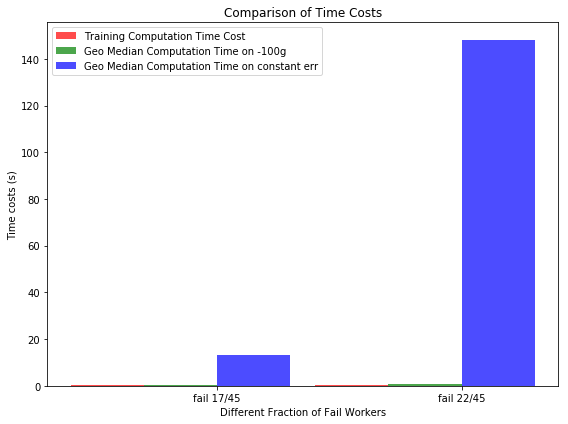

In [12]:
n_groups = 2

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.7

error_config = {'ecolor': '0.3'}
computation_time = [0.21, 0.21]
geo_median_computation_time_100g = [0.41, 0.74]
geo_median_computation_time_constant = [13.4, 148.2]
rects1 = plt.bar(index-bar_width, computation_time, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Training Computation Time Cost')

rects2 = plt.bar(index, geo_median_computation_time_100g, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Geo Median Computation Time on -100g')

rects3 = plt.bar(index+bar_width, geo_median_computation_time_constant, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Geo Median Computation Time on constant err')

plt.xlabel('Different Fraction of Fail Workers')
plt.ylabel('Time costs (s)')
plt.title('Comparison of Time Costs')
plt.xticks(index + bar_width / 2, ('fail 17/45', 'fail 22/45'))
plt.legend()

plt.tight_layout()
plt.show()